<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import requests
from tqdm.auto import tqdm

In [2]:
sber = '3529'
page = 1
num_per_page = 100
moscow = 1
url = f'https://api.hh.ru/vacancies?employer_id={sber}&per_page={num_per_page}'

In [3]:
res = requests.get(url)
vacancies = res.json()
num_pages = vacancies.get('pages')
num_pages

20

In [4]:
all_vacancy_ids= []
for i in tqdm(range(vacancies.get('pages'))):
    url = f'https://api.hh.ru/vacancies?employer_id={sber}&page={i}&per_page={num_per_page}&area={moscow}'
    res = requests.get(url)
    vacancies = res.json()
    vacancy_ids = [el.get('id') for el in vacancies.get('items')]
    all_vacancy_ids.extend(vacancy_ids)

  0%|          | 0/20 [00:00<?, ?it/s]

In [5]:
# ₽Задание вытащить все вакансии СБЕРа с ХХ (у апи есть ограничение в 2000, подумайте как его обойти)
# Вытащите все полные описания этих вакансий по запросу с https://api.hh.ru/vacancies/43326020 где 43326020 id вакансии
# Создайте аналогичный vacancy DataFrame только добавьте поле skills
# Переведите даты публикаций в datetime
# Постройте график опубликованных вакансий по датам
# Переведите даты в дни недели, и определите день недели, в который больше всего публикуют вакансий
# Найдите те вакансии с использованием python, которые вам интересны
# Определите по полю skills какие навыки больше всего востребованы для этих вакансий, и
# Постройте график наиболее востребованных вакансий

In [6]:
# Вытащите все полные описания этих вакансий по запросу с https://api.hh.ru/vacancies/43326020 где 43326020 id вакансии
sber_vacs = []
for i in tqdm(all_vacancy_ids):
    url = f'https://api.hh.ru/vacancies/{i}'
    sber_vacs.append(requests.get(url.format(i)).json())   

  0%|          | 0/904 [00:00<?, ?it/s]

In [7]:
# Создайте аналогичный vacancy DataFrame только добавьте поле skills

In [8]:
import pandas as pd
df = pd.DataFrame(sber_vacs)

In [9]:
vacssberdf=df[['id','published_at','created_at','name', 'description','type','site', 'key_skills']]

In [10]:
# Переведите даты публикаций в datetime

In [11]:
import datetime

In [12]:
vacssberdf['published_at'] = pd.to_datetime(vacssberdf['published_at'], dayfirst=True)
vacssberdf['created_at'] = pd.to_datetime(vacssberdf['created_at'], dayfirst=True)
vacssberdf['created_at'] = pd.to_datetime(vacssberdf['created_at'], format="%d/%m/%Y")
vacssberdf['published_at'] = pd.to_datetime(vacssberdf['published_at'], format="%d/%m/%Y")
vacssberdf['normalised_date'] = vacssberdf['published_at'].dt.normalize()

<ipython-input-12-a1621f91bf93>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vacssberdf['published_at'] = pd.to_datetime(vacssberdf['published_at'], dayfirst=True)
<ipython-input-12-a1621f91bf93>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vacssberdf['created_at'] = pd.to_datetime(vacssberdf['created_at'], dayfirst=True)
<ipython-input-12-a1621f91bf93>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

In [13]:
# Постройте график опубликованных вакансий по датам

In [14]:
import matplotlib.pyplot as plt

In [15]:
df2= vacssberdf.groupby('normalised_date').count()['id']

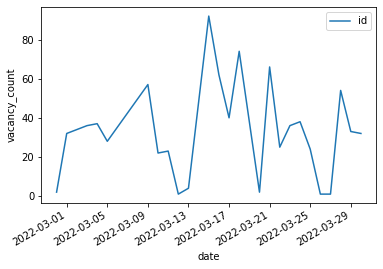

In [16]:
df2.plot()
plt.xlabel('date')
plt.ylabel('vacancy_count')
plt.legend(['id'])

In [17]:
# Переведите даты в дни недели, и определите день недели, в который больше всего публикуют вакансий

In [18]:
df3 = vacssberdf.copy()
df3['day_of_week'] = df3['normalised_date'].dt.day_name()

In [19]:
df3_group = df3.groupby('day_of_week').count().reset_index()
df3_group['day_of_week'].max()

'Wednesday'

In [20]:
# Найдите те вакансии с использованием python, которые вам интересны

In [29]:
my_vacancy = vacssberdf[(vacssberdf['name'].isin(['Data analyst', 'Аналитик данных']))]

In [22]:
my_vacancy

,id,published_at,created_at,name,description,type,site,key_skills,normalised_date
53,54167022,2022-03-21 17:33:05+03:00,2022-03-21 17:33:05+03:00,Аналитик данных,<p><strong><strong>Тебе предстоит:</strong></s...,"{'id': 'open', 'name': 'Открытая'}","{'id': 'hh', 'name': 'hh.ru'}",[],2022-03-21 00:00:00+03:00
55,53802196,2022-03-14 10:15:07+03:00,2022-03-14 10:15:07+03:00,Аналитик данных,"<p>Сбер — больше чем банк, это динамично разви...","{'id': 'open', 'name': 'Открытая'}","{'id': 'hh', 'name': 'hh.ru'}",[],2022-03-14 00:00:00+03:00
298,53931717,2022-03-16 13:07:29+03:00,2022-03-16 13:07:29+03:00,Data analyst,<p>Команда КАП. Панель Кибербезопасности</p> <...,"{'id': 'open', 'name': 'Открытая'}","{'id': 'hh', 'name': 'hh.ru'}",[],2022-03-16 00:00:00+03:00
505,53630353,2022-03-10 13:46:35+03:00,2022-03-10 13:46:35+03:00,Data analyst,<p><strong>Команда КАП. Панель Кибербезопаснос...,"{'id': 'open', 'name': 'Открытая'}","{'id': 'hh', 'name': 'hh.ru'}","[{'name': 'SQL'}, {'name': 'Поисковые системы'...",2022-03-10 00:00:00+03:00


In [23]:
# Определите по полю skills какие навыки больше всего востребованы для этих вакансий, и

In [24]:
my_vacancy['key_skills']

53                                                    []
55                                                    []
298                                                   []
505    [{'name': 'SQL'}, {'name': 'Поисковые системы'...
Name: key_skills, dtype: object

In [25]:
# Постройте график наиболее востребованных вакансий

Text(0, 0.5, 'Вакансия')

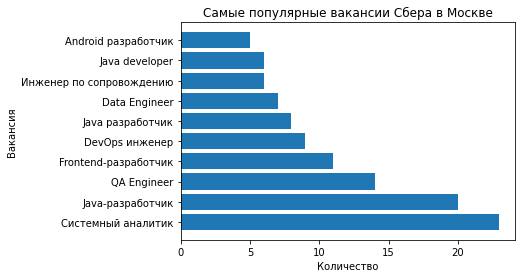

In [69]:
top_vacation = vacssberdf.copy()
top_vacation = top_vacation.groupby('name').count()
top_vacation = top_vacation.sort_values(by='id', ascending=False).head(10).reset_index()
plt.barh(top_vacation['name'], top_vacation['id'])
plt.title('Самые популярные вакансии Сбера в Москве')
plt.xlabel('Количество')
plt.ylabel('Вакансия')